In [23]:
import pandas as pd
pubmed = pd.read_csv('data/all_pubmed.csv') # make sure pubmed has a column named 'category'
print(pubmed.columns)
pubmed.head()

Index(['pubmed_id', 'title', 'keywords', 'journal', 'abstract', 'methods',
       'results', 'conclusions', 'publication_date', 'category'],
      dtype='object')


,pubmed_id,title,keywords,journal,abstract,methods,results,conclusions,publication_date,category
0,40073121,Targeting the NPY/NPY1R signaling axis in muta...,NaN,Science advances,Pancreatic cancer (PC) is a highly metastatic ...,NaN,NaN,NaN,2025-03-12,Pubmed_Pancreatic_Cancer.csv
1,40069621,The value of preoperative RDW for post-pancrea...,"Pancreatic ductal adenocarcinoma, Post-pancrea...",BMC cancer,Pancreatic ductal adenocarcinoma (PDAC) is a h...,NaN,A total of 2268 patients were analyzed. We fou...,The preoperative RDW may be a useful marker fo...,2025-03-12,Pubmed_Pancreatic_Cancer.csv
2,40069616,"Protocol of the IMPACT study: randomized, mult...","Atezolizumab, Bevacizumab, Conversion, Hepatoc...",BMC cancer,Atezolizumab plus bevacizumab is recommended a...,NaN,NaN,NaN,2025-03-12,Pubmed_Pancreatic_Cancer.csv
3,40066089,Association between human leukocyte antigen E ...,"HLA-E, cancer, human leukocyte antigen, immuno...",Frontiers in oncology,Immunotherapy has gained momentum with the dis...,NaN,"After screening 657 articles, 11 studies were ...",This systematic review highlights that HLA-E e...,2025-03-11,Pubmed_Pancreatic_Cancer.csv
4,40065459,Oncological and Survival Endpoints in Cancer C...,"adverse events, cachexia, cancer, clinical tri...","Journal of cachexia, sarcopenia and muscle","In patients receiving anti-cancer treatment, c...",NaN,"Fifty-seven trials were eligible, totalling 97...","In CC trials, oncological endpoints were mostl...",2025-03-11,Pubmed_Pancreatic_Cancer.csv


In [24]:
pubmed['category'] = (
    pubmed['category']
    .str.replace("Pubmed_", "", regex=False)
    .str.replace(".csv", "", regex=False)
    .str.replace("_", " ", regex=False)
    .str.replace("-", " ")  # Optional: Replace hyphens with spaces if needed
    .str.title()  # Capitalize each word
)
pubmed['category'].value_counts()


category
Pancreatic Cancer              9831
Influenza                      8905
Hepatitis                      7087
Malaria                        6855
Endometriosis                  2839
Duchenne Muscular Dystrophy    1423
Drug Resistant Tuberculosis    1274
Chagas Disease                  680
Breast Cancer                   171
Alzheimer                        60
Name: count, dtype: int64

for rare diseases

In [17]:
pubmed = pubmed[pubmed['category'].isin(['Pancreatic Cancer', 'Endometriosis', 'Chagas Disease','Drug Resistant Tuberculosis', 'Duchenne Muscular Dystrophy'])]

In [18]:
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'], errors="coerce")

### 1) Number of samples per category
category_counts = pubmed['category'].value_counts()
print("Number of samples per category:")
print(category_counts)
print("\n")

### 2) Top 10 journal venues per category
top_journals = pubmed.groupby('category')['journal'].value_counts().groupby(level=0).head(10)
print("Top 10 journal venues per category:")
print(top_journals)
print("\n")

### 3) Earliest, latest publication date, and elapsed days per category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max'])
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days  # Compute elapsed days
print("Earliest, latest publication date, and elapsed days per category:")
print(date_range)


Number of samples per category:
category
Pancreatic Cancer              9831
Endometriosis                  2839
Duchenne Muscular Dystrophy    1423
Drug Resistant Tuberculosis    1274
Chagas Disease                  680
Name: count, dtype: int64


Top 10 journal venues per category:
category                     journal                                                                                                                                           
Chagas Disease               PLoS neglected tropical diseases                                                                                                                       30
                             PloS one                                                                                                                                               23
                             Arquivos brasileiros de cardiologia                                                                                                             

/tmp/ipykernel_8893/4216411280.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)


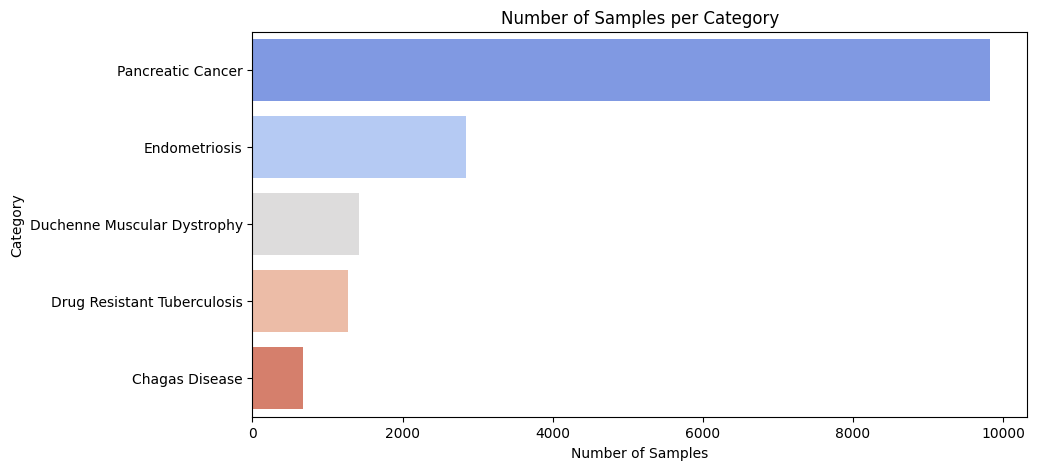

/tmp/ipykernel_8893/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


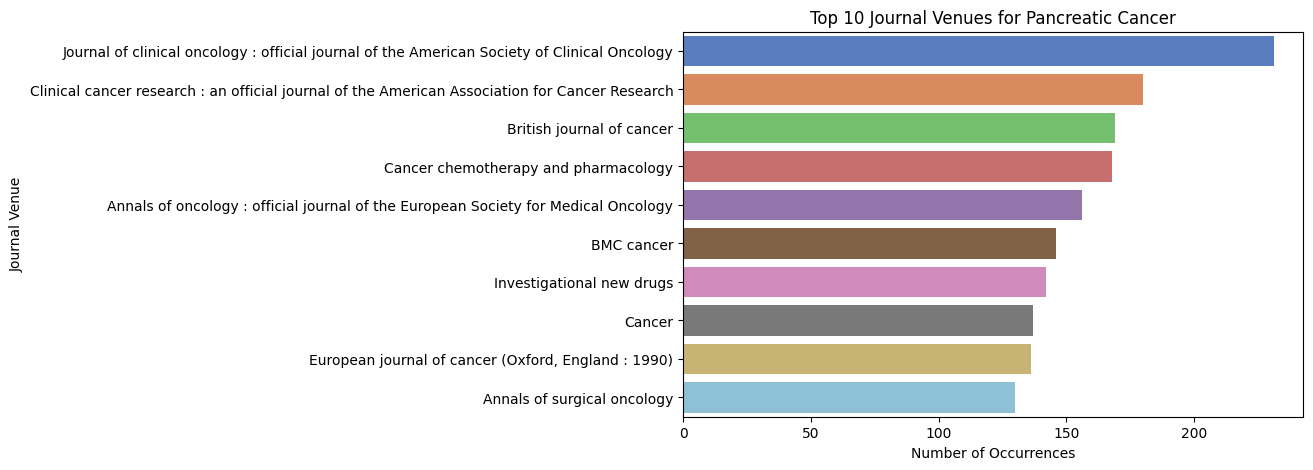

/tmp/ipykernel_8893/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


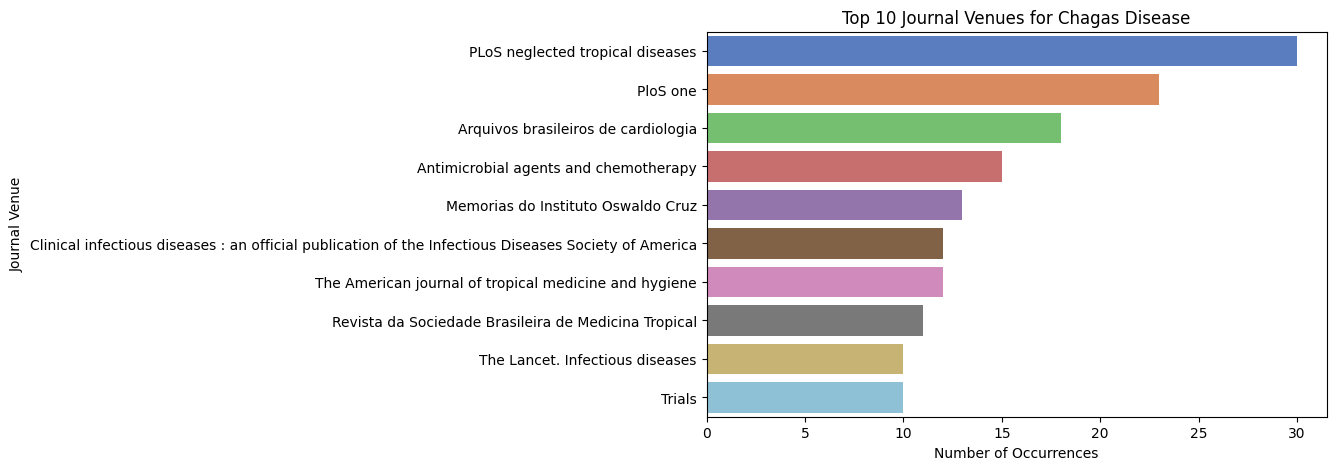

/tmp/ipykernel_8893/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


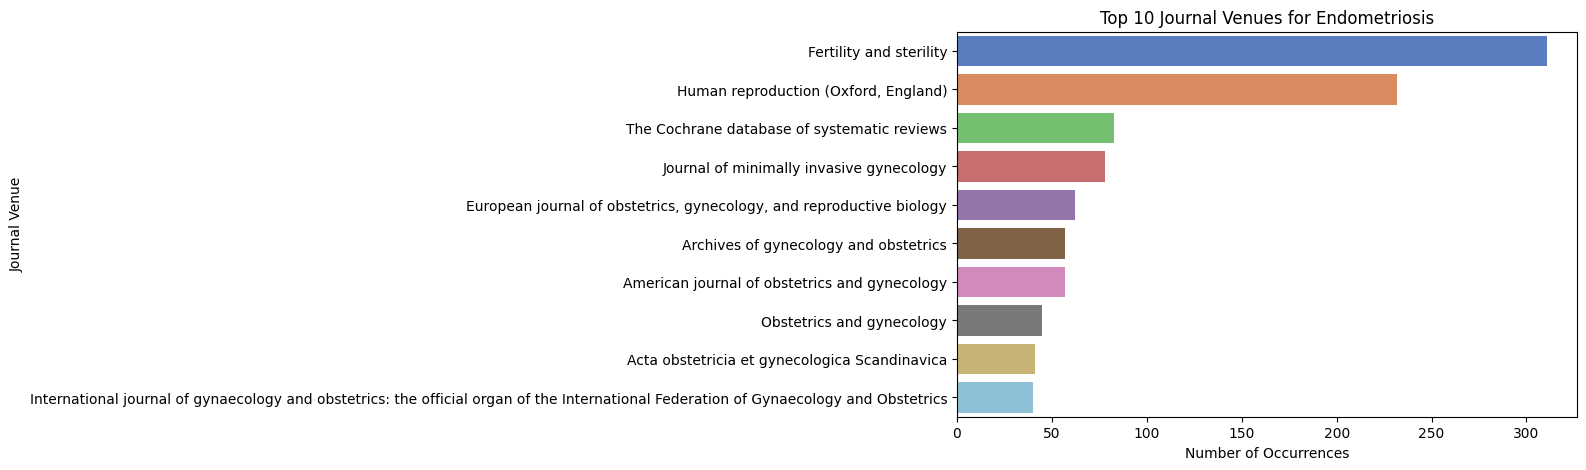

/tmp/ipykernel_8893/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


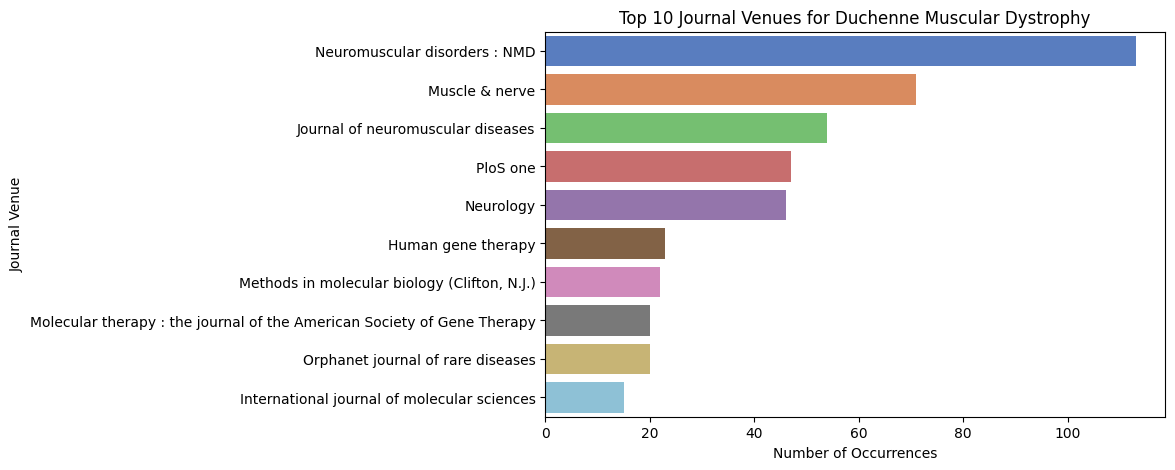

/tmp/ipykernel_8893/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


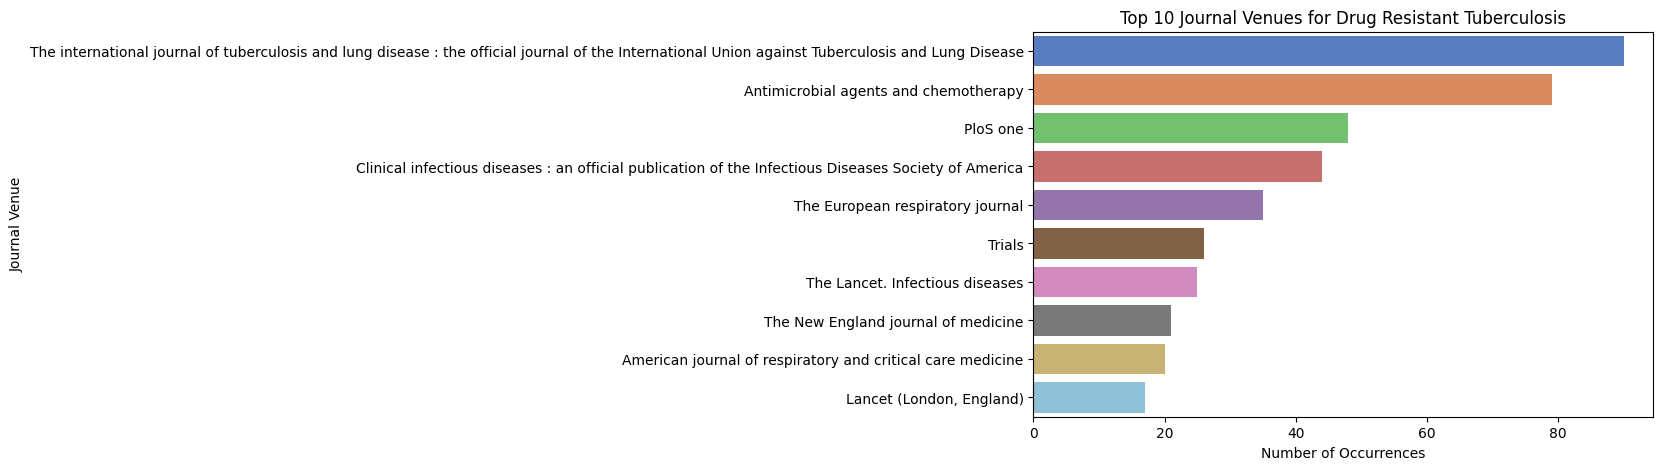

/tmp/ipykernel_8893/4216411280.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")


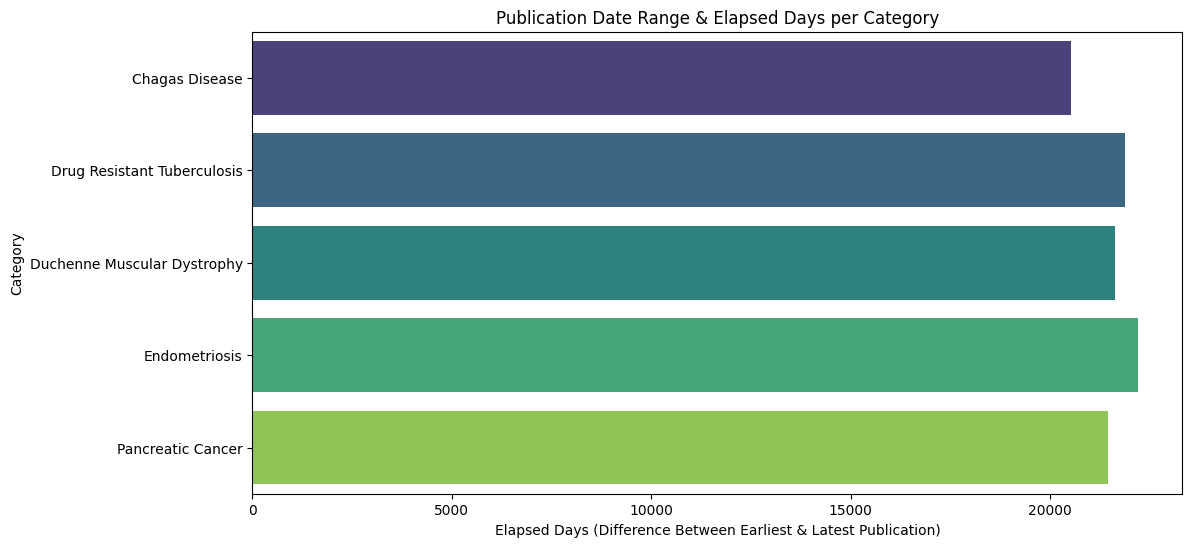

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'])

# 1) Number of Samples per Category
plt.figure(figsize=(10, 5))
sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.title("Number of Samples per Category")
plt.show()

categories = pubmed['category'].unique()

for category in categories:
    plt.figure(figsize=(8, 5))
    category_data = pubmed[pubmed['category'] == category]['journal'].value_counts().head(10)
    
    sns.barplot(y=category_data.index, x=category_data.values, palette="muted")
    plt.xlabel("Number of Occurrences")
    plt.ylabel("Journal Venue")
    plt.title(f"Top 10 Journal Venues for {category}")
    plt.show()

# 3) Earliest, Latest Publication Date, and Elapsed Days per Category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max']).reset_index()
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days

plt.figure(figsize=(12, 6))
sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")
plt.xlabel("Elapsed Days (Difference Between Earliest & Latest Publication)")
plt.ylabel("Category")
plt.title("Publication Date Range & Elapsed Days per Category")
plt.show()


# For Common Disease

In [25]:
pubmed = pubmed[~pubmed['category'].isin(['Pancreatic Cancer', 'Endometriosis', 'Chagas Disease', 'Drug Resistant Tuberculosis', 'Duchenne Muscular Dystrophy'])]

In [26]:
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'], errors="coerce")

### 1) Number of samples per category
category_counts = pubmed['category'].value_counts()
print("Number of samples per category:")
print(category_counts)
print("\n")

### 2) Top 10 journal venues per category
top_journals = pubmed.groupby('category')['journal'].value_counts().groupby(level=0).head(10)
print("Top 10 journal venues per category:")
print(top_journals)
print("\n")

### 3) Earliest, latest publication date, and elapsed days per category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max'])
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days  # Compute elapsed days
print("Earliest, latest publication date, and elapsed days per category:")
print(date_range)


Number of samples per category:
category
Influenza        8905
Hepatitis        7087
Malaria          6855
Breast Cancer     171
Alzheimer          60
Name: count, dtype: int64


Top 10 journal venues per category:
category       journal                                                                                                             
Alzheimer      Alzheimer's & dementia : the journal of the Alzheimer's Association                                                      13
               The journal of prevention of Alzheimer's disease                                                                          8
               Alzheimer's & dementia (New York, N. Y.)                                                                                  5
               International psychogeriatrics                                                                                            5
               The American journal of geriatric psychiatry : official journal of the American As

/tmp/ipykernel_8893/2142337901.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)


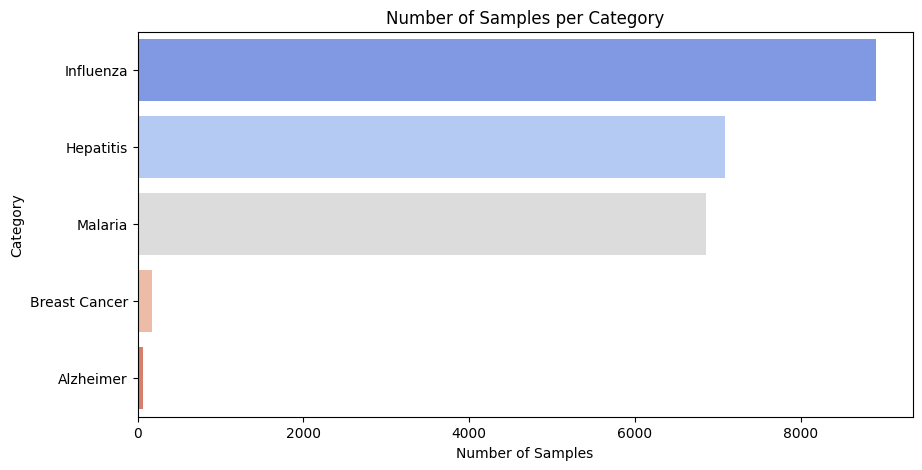

/tmp/ipykernel_8893/2142337901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


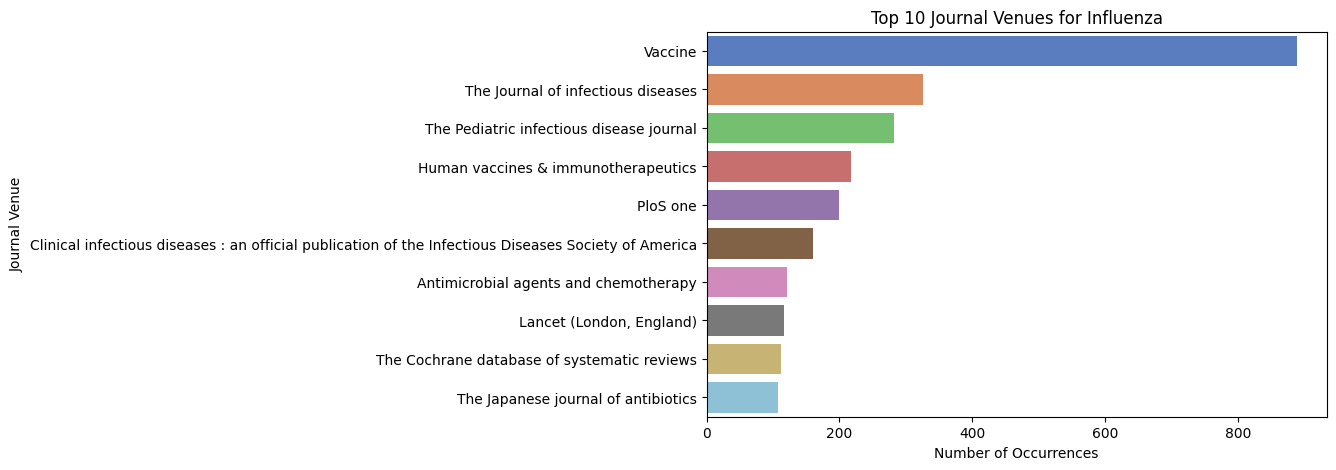

/tmp/ipykernel_8893/2142337901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


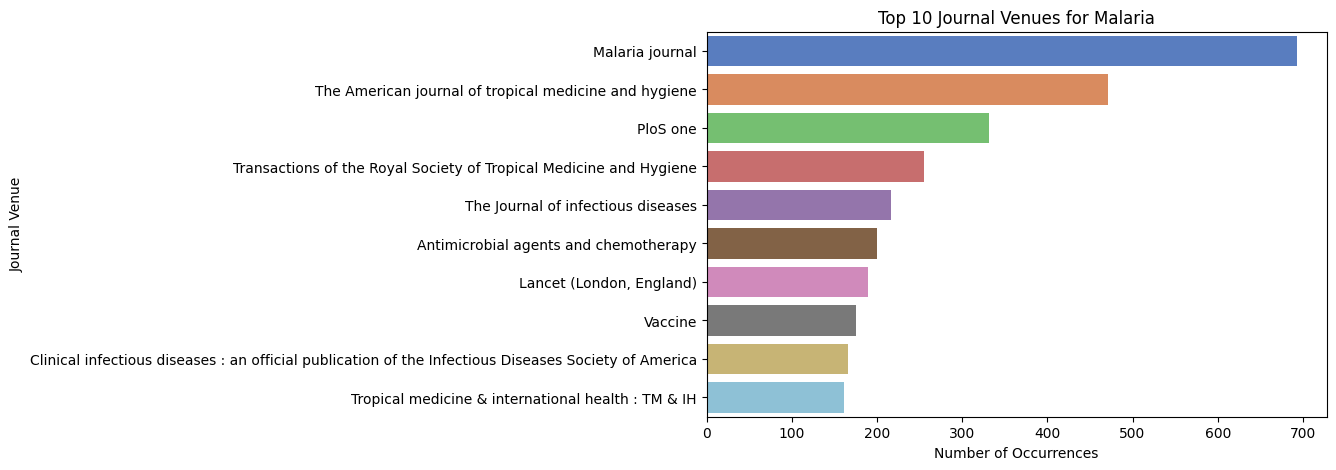

/tmp/ipykernel_8893/2142337901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


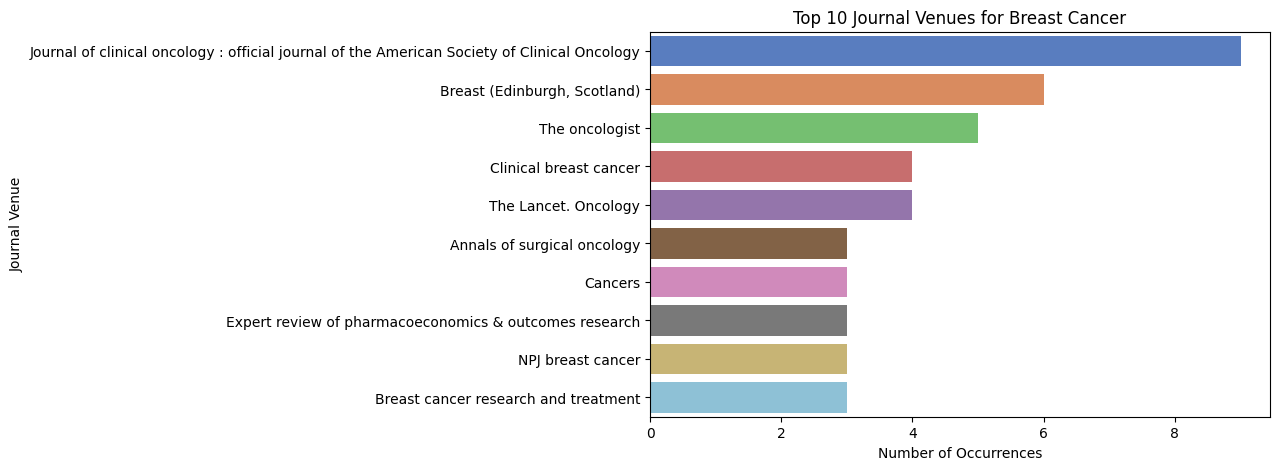

/tmp/ipykernel_8893/2142337901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


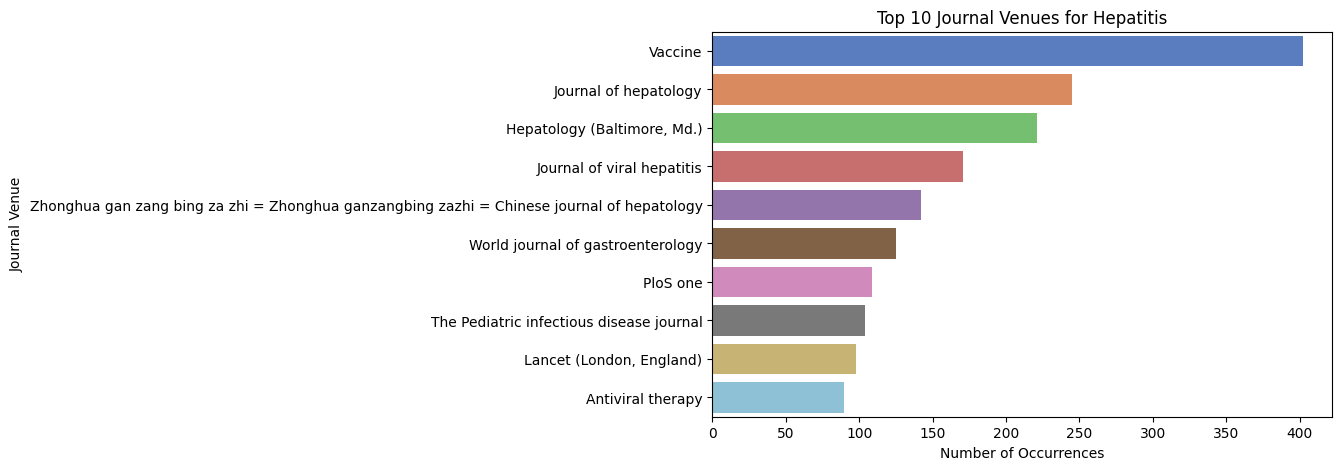

/tmp/ipykernel_8893/2142337901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


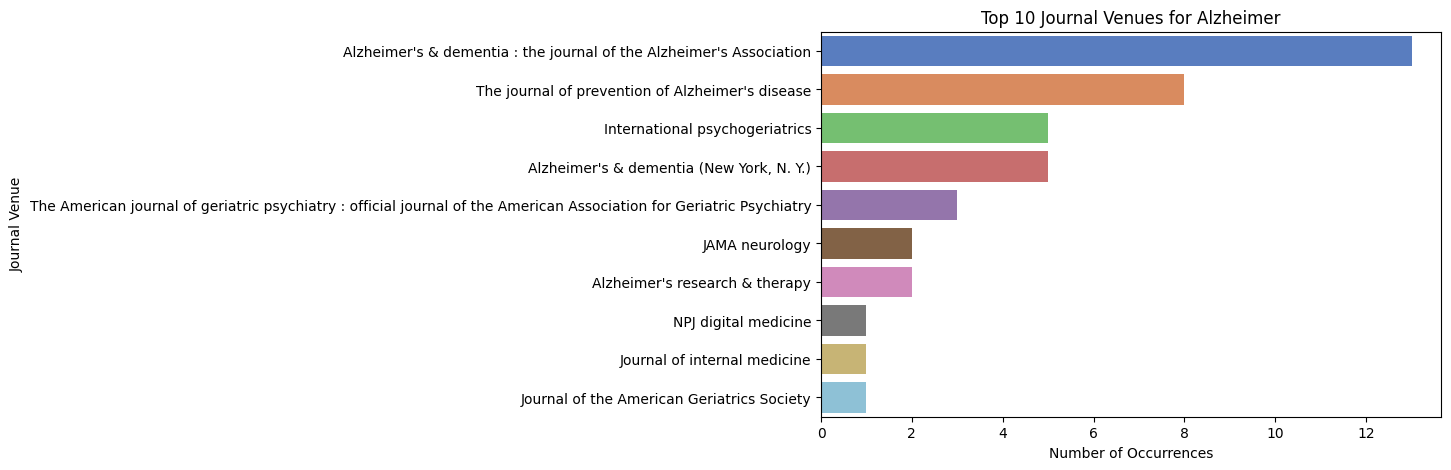

/tmp/ipykernel_8893/2142337901.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")


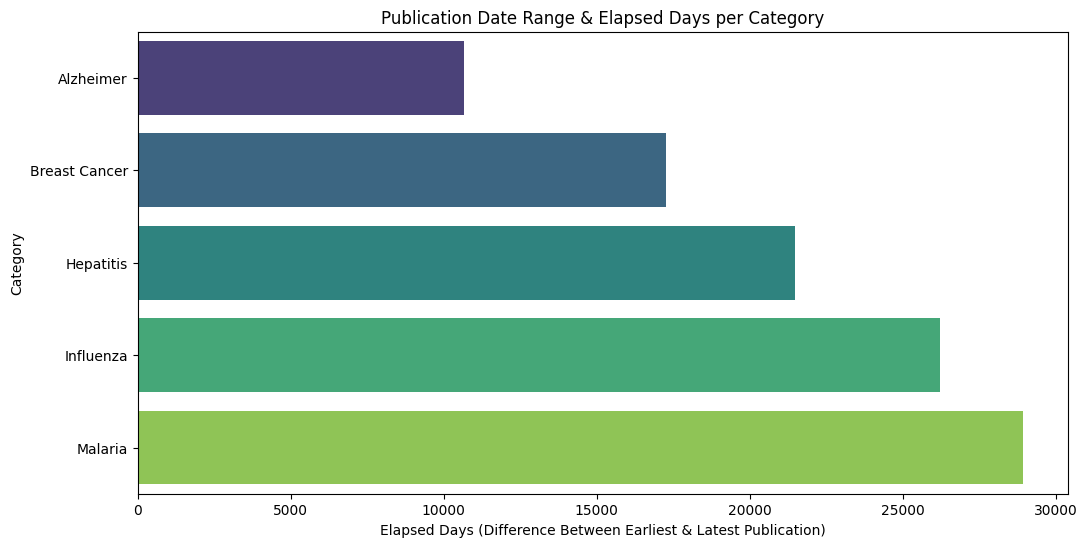

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'])

# 1) Number of Samples per Category
plt.figure(figsize=(10, 5))
sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.title("Number of Samples per Category")
plt.show()

categories = pubmed['category'].unique()

for category in categories:
    plt.figure(figsize=(8, 5))
    category_data = pubmed[pubmed['category'] == category]['journal'].value_counts().head(10)
    
    sns.barplot(y=category_data.index, x=category_data.values, palette="muted")
    plt.xlabel("Number of Occurrences")
    plt.ylabel("Journal Venue")
    plt.title(f"Top 10 Journal Venues for {category}")
    plt.show()

# 3) Earliest, Latest Publication Date, and Elapsed Days per Category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max']).reset_index()
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days

plt.figure(figsize=(12, 6))
sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")
plt.xlabel("Elapsed Days (Difference Between Earliest & Latest Publication)")
plt.ylabel("Category")
plt.title("Publication Date Range & Elapsed Days per Category")
plt.show()
